# test_cylinder.ipynb

### Install

In [ ]:
pip install git+https://github.com/grmacchio/dynml.git

### Imports and Data Type Settings

In [20]:
from matplotlib.pyplot import subplots, show

from scipy.signal import find_peaks
from torch import float64, linspace, mean, set_default_dtype

from dynml.examples.cylinder import Cylinder
from dynml.dyn.discrete.numsolve import gen_num_trajs

In [4]:
set_default_dtype(float64)                                                      # set the default data type

### Generate a Trajectory

In [5]:
ds = Cylinder()
t_final = 200.0  
num_samples = int(t_final / ds.dt) + 1
traj = gen_num_trajs(ds, ds.gen_ic, 1, num_samples)

100%|██████████| 15071/15071 [1:00:00<00:00,  4.19it/s]


### Examine The Last State

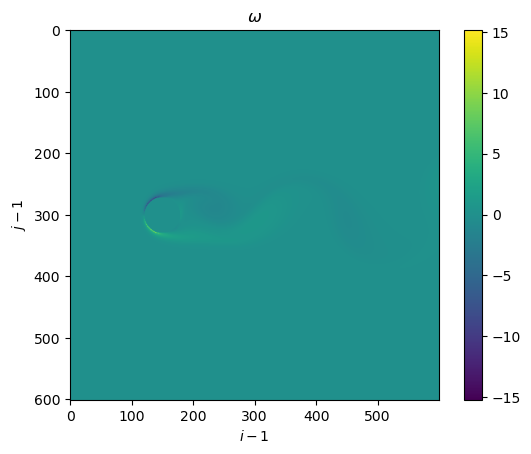

In [26]:
fig, ax = subplots()
omega_last = ds.x_to_omega(traj[0, -1])
plot = ax.imshow(omega_last)
fig.colorbar(plot)
ax.set_title("$\\omega$")
ax.set_xlabel("$i - 1$")
ax.set_ylabel("$j - 1$")
show()

### Examine the Strouhal Number

Strouhal number: 0.190


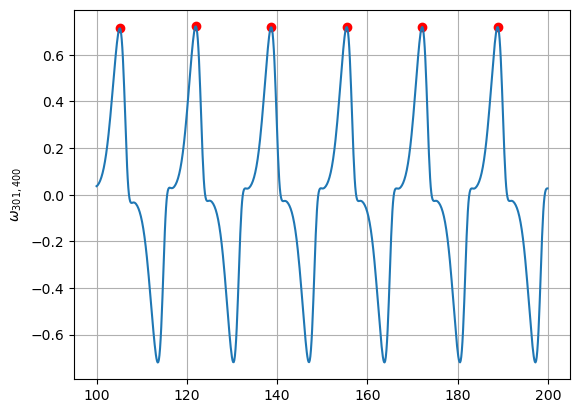

In [25]:
fig, ax = subplots()
t_start = 100.0
n_start = int(t_start / ds.dt)
t_span = linspace(t_start, t_final, num_samples - n_start)[::10]
w = ds.x_to_omega(traj[0, n_start:][::10])[:, ds.N_2, 400]
peaks, _ = find_peaks(w, height=0.1)
T = mean(t_span[peaks[1:]] - t_span[peaks[:-1]])
f = 1 / T
Sr = f * (2 * ds.R) / ds.U_inf
print(f"Strouhal number: {Sr:.3f}")
ax.plot(t_span, w)
ax.grid()
ax.scatter(t_span[peaks], w[peaks], marker='o', color='red')
ax.set_ylabel('$\\omega_{301, 400}$')
show()